In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import os

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('training data shape:', x_train.shape)
print('training labels shape:', y_train.shape)
print('test data shape:', x_test.shape)
print('test labels shape:', y_test.shape)

training data shape: (50000, 32, 32, 3)
training labels shape: (50000, 1)
test data shape: (10000, 32, 32, 3)
test labels shape: (10000, 1)


In [4]:
model = tf.keras.models.Sequential()

In [5]:
model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3, 3),
                                 input_shape=(32, 32, 3),
                                 activation='relu',
                                 padding='same'))

In [6]:
model.add(tf.keras.layers.Dropout(rate=0.3))

In [7]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [8]:
model.add(tf.keras.layers.Conv2D(filters=64,
                                 kernel_size=(3, 3),
                                 input_shape=(32, 32, 3),
                                 activation='relu',
                                 padding='same'))

In [9]:
model.add(tf.keras.layers.Dropout(rate=0.3))

In [10]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(tf.keras.layers.Flatten())

In [12]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [14]:
epochs = 150
batch_size = 100

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
checkpoint_dir = './checkpoint2.x/'

model_filename = tf.train.latest_checkpoint(checkpoint_dir)

if model_filename != None:
    model.load_weights(model_filename)
    print('Load weights successful'.format(model_filename))
else:
    print('No weights saved, train from scratch!')

Load weights successful


In [17]:
log_dir = os.path.join(
    'logs2.x',
    'train',
    'plugins',
    'profile',
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))

checkpoint_path = './checkpoint2.x/Cifar10.{epoch:02d}.ckpt'

if not os.path.exists('./checkpoint2.x'):
    os.mkdir('./checkpoint2.x')


callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                         histogram_freq=2),
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_weights_only=True,
                                       verbose=0,
                                       save_freq='epoch'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
]

In [18]:
train_history = model.fit(x_train, y_train,
                          validation_split=0.2,
                          epochs=epochs,
                          batch_size=batch_size,
                          callbacks=callbacks,
                          verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/150
40000/40000 [==============================] - 11s 268us/sample - loss: 1.0233 - accuracy: 0.6450 - val_loss: 1.1700 - val_accuracy: 0.6077
Epoch 2/150
40000/40000 [==============================] - 8s 207us/sample - loss: 1.0237 - accuracy: 0.6435 - val_loss: 1.1060 - val_accuracy: 0.6231
Epoch 3/150
40000/40000 [==============================] - 8s 211us/sample - loss: 1.0076 - accuracy: 0.6500 - val_loss: 1.1132 - val_accuracy: 0.6252
Epoch 4/150
40000/40000 [==============================] - 8s 207us/sample - loss: 1.0128 - accuracy: 0.6500 - val_loss: 1.2060 - val_accuracy: 0.5831
Epoch 5/150
40000/40000 [==============================] - 8s 211us/sample - loss: 0.9775 - accuracy: 0.6612 - val_loss: 1.1151 - val_accuracy: 0.6189
Epoch 6/150
40000/40000 [==============================] - 8s 212us/sample - loss: 0.9689 - accuracy: 0.6634 - val_loss: 1.1025 - val_accuracy: 0.6330
Epoch 7/150
40000/40000 [==================

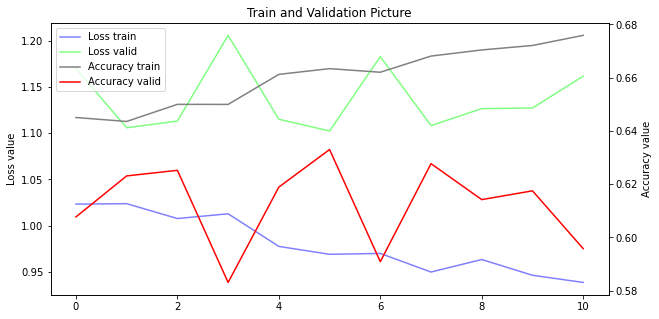

In [19]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(111)
ax1.set_title('Train and Validation Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(train_history.history['loss'], color=(0.5, 0.5, 1.0), label='Loss train')
line2, = ax1.plot(train_history.history['val_loss'], color=(0.5, 1.0, 0.5), label='Loss valid')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line3, = ax2.plot(train_history.history['accuracy'], color=(0.5, 0.5, 0.5), label='Accuracy train')
line4, = ax2.plot(train_history.history['val_accuracy'], color=(1, 0, 0), label='Accuracy valid')
plt.legend(handles=(line1, line2, line3, line4), loc='best')
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('test_loss:', test_loss,
      '\ntest_acc:', test_acc,
      '\nmetrics_names:', model.metrics_names)

10000/1 - 1s - loss: 1.0161 - accuracy: 0.5990
test_loss: 1.1660289595603943 
test_acc: 0.599 
metrics_names: ['loss', 'accuracy']


In [21]:
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer",
              5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}


def plot_images_prediction_labels(images, labels, num):
    total = len(images)
    fig = plt.gcf()
    fig.set_size_inches(15, math.ceil(num / 10) * 7)
    for i in range(0, num):
        choose_n = np.random.randint(0, total)
        ax = plt.subplot(math.ceil(num / 5), 5, 1 + i)
        ax.imshow(images[choose_n], cmap='binary')
        test_pred = model.predict_classes(images.astype('float32')[choose_n:choose_n + 1])
        title = 'label:' + label_dict[labels[choose_n][0]] + ' pred:' + label_dict[test_pred[0]]
        ax.set_title(title, fontsize=10)
    plt.show()

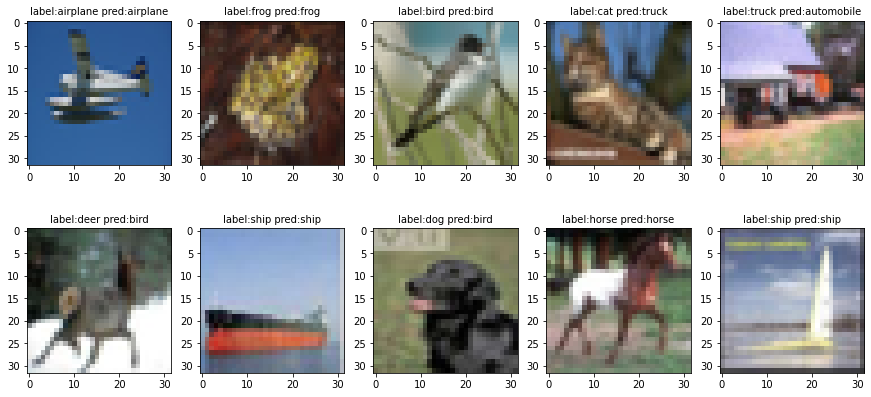

In [22]:
plot_images_prediction_labels(x_test, y_test, 10)